<a href="https://colab.research.google.com/github/corinnakeum1/DS-4002/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import pickle
from collections import Counter
from multiprocessing.pool import Pool
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt


#df = pd.read_csv('Phishing_Email.csv')
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')
# Tokenize the email text
df['Tokens'] = df['Email Text'].str.split()

# Display some results
print(df[['Email Text', 'Tokens']].head())


                                          Email Text  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1  the other side of * galicismos * * galicismo *...   
2  re : equistar deal tickets are you still avail...   
3  \nHello I am your hot lil horny toy.\n    I am...   
4  software at incredibly low prices ( 86 % lower...   

                                              Tokens  
0  [re, :, 6, ., 1100, ,, disc, :, uniformitarian...  
1  [the, other, side, of, *, galicismos, *, *, ga...  
2  [re, :, equistar, deal, tickets, are, you, sti...  
3  [Hello, I, am, your, hot, lil, horny, toy., I,...  
4  [software, at, incredibly, low, prices, (, 86,...  


Open the Phishing_Email.parquet data. It is available at https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet, and you can download it directly using Pandas by providing that URL: df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet').

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The Email Text variable contains the actual text of the email and the Email Type takes the value Phishing Email or Safe Email. We want to predict which emails are phishing emails from their contents.

Use the str.split() method to break the Phishing Email values into tokens: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

I would clean the token and use them to predict whether the email is phishing scam by removing "Stop words". This would remove punctuation and common words that are not important to finding the scams because they do not raise red flags. I would then encode the token and then run an algorithm used the presence of the tokens to predict whether or not the emails are scames.

In [3]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


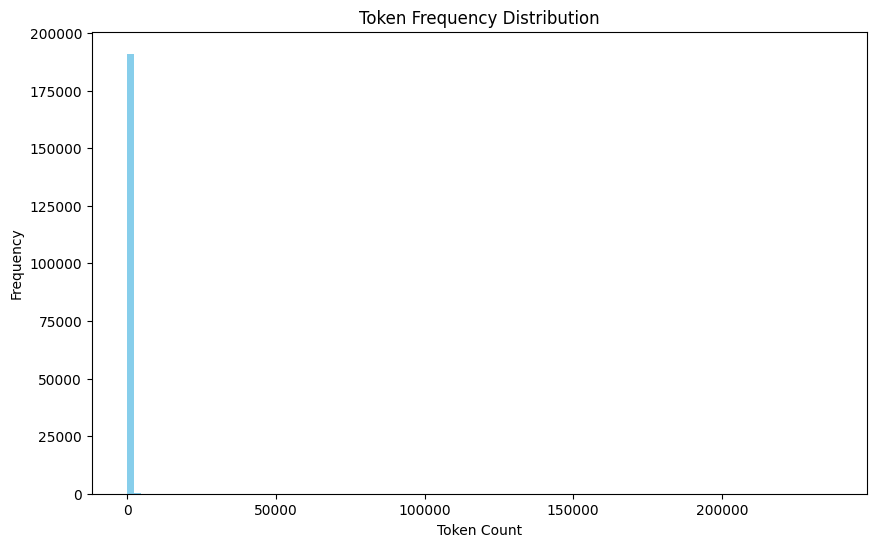

In [4]:
import pickle
import re
from nltk.corpus import stopwords
import nltk
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')

# Tokenize and clean the email text
all_emails = ' '.join(df['Email Text'])
all_emails_cleaned = re.sub(r'[^\w\s]', '', all_emails.lower())  # Remove punctuation and lowercase
tokens = all_emails_cleaned.split()

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Save tokens to a pickle file
with open('all_tokens.pickle', 'wb') as file:
    pickle.dump(filtered_tokens, file)

# Load tokens from the pickle file
with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

# Count token frequencies
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

# Create a DataFrame for visualization
gdf = pd.DataFrame(token_freq, columns=['token', 'count'])

# Plot histogram
plt.figure(figsize=(10, 6))
gdf['count'].hist(grid=False, bins=100, color='skyblue')
plt.title('Token Frequency Distribution')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.show()




In [5]:
gdf['count'].describe()

,count
count,191248.000000
mean,26.641617
std,593.506088
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,236924.000000


This shows that most of the tokens appear once and a handful appear more than ten times. Even the 75th percentile of tokens only appear 6 times and 50th only 2 times. But the max token appears 236,000+ times. This shows that it can't possibly be predictive of a scam.

In [6]:

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('stopwords')

# Load the parquet file
df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')

# Define a function to clean the email text
def clean_email(email_text):
    # Remove punctuation and convert to lowercase
    email_text = re.sub(r'[^\w\s]', '', email_text).lower()
    # Tokenize the email text
    tokens = email_text.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the cleaning function to the 'Email Text' column
df['Cleaned Email Text'] = df['Email Text'].apply(clean_email)

# Drop unnecessary columns, if any
# df = df.drop(columns=['Tokens'], errors='ignore') # Commented out to preserve the original code

# Save to CSV
df.to_csv('cleaned_phishing_email.csv', index=False)

# Download the CSV file from Colab
from google.colab import files
files.download('cleaned_phishing_email.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/cleaned_phishing_email.csv')

# Check the first few rows to inspect the data
print(df.head())

# Check the data types to understand the structure
print(df.dtypes)


   index  Unnamed: 0                                         Email Text  \
0      0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1      1           1  the other side of * galicismos * * galicismo *...   
2      2           2  re : equistar deal tickets are you still avail...   
3      3           3  \nHello I am your hot lil horny toy.\n    I am...   
4      4           4  software at incredibly low prices ( 86 % lower...   

       Email Type                                 Cleaned Email Text  
0      Safe Email  6 1100 disc uniformitarianism 1086 sex lang di...  
1      Safe Email  side galicismos galicismo spanish term names i...  
2      Safe Email  equistar deal tickets still available assist r...  
3  Phishing Email  hello hot lil horny toy one dream open minded ...  
4  Phishing Email  software incredibly low prices 86 lower draper...  
index                  int64
Unnamed: 0             int64
Email Text            object
Email Type            object
Cleaned

In [8]:
X = pd.get_dummies(df.drop('Email Type', axis=1))  # One-hot encode categorical features


In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Email Type' to numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Email Type'])


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('cleaned_phishing_email.csv')

# Define target (y) and encode it
le = LabelEncoder()
y = le.fit_transform(df['Email Type'])  # Encode string labels into numeric

# Define features (X) and ensure they are numeric
X = df.drop(columns=['Email Type'])

# Handle text columns
if any(X.dtypes == 'object'):  # Check if any column is of type object (likely contains text)
    from sklearn.feature_extraction.text import TfidfVectorizer

    # Assuming text is in the first column; update column index/name as needed
    text_column = X.iloc[:, 0].astype(str)  # Convert to string
    vectorizer = TfidfVectorizer(max_features=1000)  # Adjust feature limit as needed

    # Fit-transform the text data
    X_vectorized = vectorizer.fit_transform(text_column)

    # Replace the original text column with vectorized features
    X = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression model
lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train)

# Predictions and R^2 scores
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")

# Feature importance (absolute coefficients)
# If vectorized, X.columns will not match original features; use vectorizer's feature names
feature_names = (
    vectorizer.get_feature_names_out() if 'vectorizer' in locals() else X.columns
)

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_[0]
})
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()

# Sort by absolute coefficient value
top_influential_features = coefficients.sort_values(by='AbsCoefficient', ascending=False).head(10)
print("\nTop 10 Influential Features:\n", top_influential_features)


Train R^2: -0.5491
Test R^2: -0.6872

Top 10 Influential Features:
     Feature  Coefficient  AbsCoefficient
0        10    -0.491357        0.491357
513    4311    -0.491357        0.491357
535    4331    -0.491357        0.491357
534    4330    -0.491357        0.491357
532    4329    -0.491357        0.491357
531    4328    -0.491357        0.491357
529    4326    -0.491357        0.491357
528    4325    -0.491357        0.491357
527    4324    -0.491357        0.491357
526    4323    -0.491357        0.491357


Perform an 80/20 train-test split of the data.
Run a regression of
 on the one-hot-encoded emails. What is the
 on the test set? On the training set?
What words have the largest coefficients in absolute value and most strongly influence predictions?

In [21]:
import pandas as pd
import numpy as np

# Ensure vectorizer or feature names are defined
if 'vectorizer' in locals():
    feature_names = vectorizer.get_feature_names_out()  # Extract from vectorizer
else:
    feature_names = X.columns  # Use DataFrame column names

# Extract coefficients from the trained logistic regression model
coefficients = lr.coef_[0]  # For binary classification, extract the first row of coefficients

# Create a DataFrame combining feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'AbsCoefficient': np.abs(coefficients)  # Calculate absolute values
})

# Sort the features by the absolute values of coefficients in descending order
top_influential_words = coef_df.sort_values(by='AbsCoefficient', ascending=False).head(10)

# Display the top influential features
print("\nTop 10 Words Influencing Predictions:")
print(top_influential_words)





Top 10 Words Influencing Predictions:
    Feature  Coefficient  AbsCoefficient
0        10    -0.491357        0.491357
513    4311    -0.491357        0.491357
535    4331    -0.491357        0.491357
534    4330    -0.491357        0.491357
532    4329    -0.491357        0.491357
531    4328    -0.491357        0.491357
529    4326    -0.491357        0.491357
528    4325    -0.491357        0.491357
527    4324    -0.491357        0.491357
526    4323    -0.491357        0.491357


Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, Email Type) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

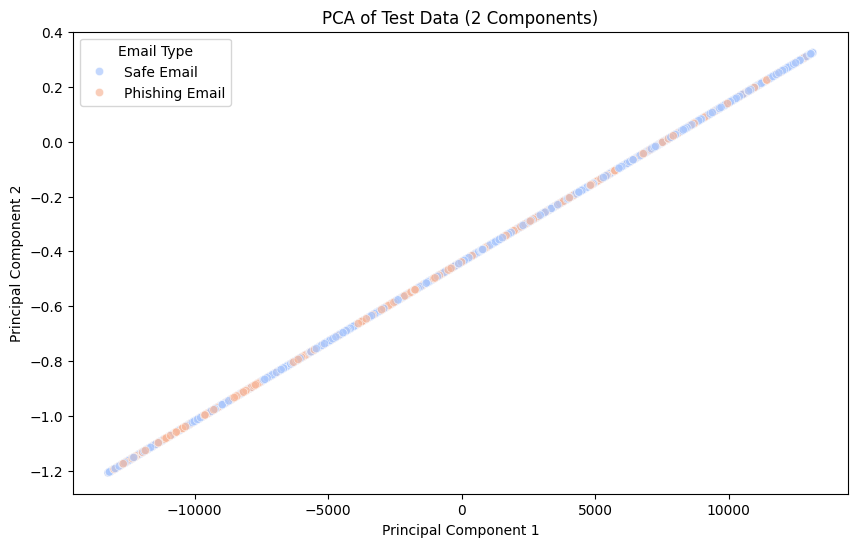

In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cleaned_phishing_email.csv')  # Replace with your dataset file path

# Define target (y) and features (X)
y = df['Email Type']  # Outcome variable
X = df.drop(columns=['Email Type'])  # Features

# Vectorize the text data if necessary
if isinstance(X.iloc[0, 0], str):  # Check if the first column contains text
    vectorizer = TfidfVectorizer(max_features=1000)
    X_vectorized = vectorizer.fit_transform(X.iloc[:, 0])  # Assuming a single text column
    X = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Ensure X is numeric and has no NaN values
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA for dimensionality reduction
reduction = PCA(n_components=2).fit(X_train)  # Fit PCA on the training data
Z_train = reduction.transform(X_train)       # Transform training data
Z_test = reduction.transform(X_test)         # Transform test data

# Plot PCA-transformed test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Z_test[:, 0], y=Z_test[:, 1], hue=y_test, palette='coolwarm', alpha=0.7)
plt.title('PCA of Test Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Email Type')
plt.show()



the orange dots are scam points and this shows that the data has high variance along one principal component while the other component contributes very little varience.

In [28]:
print(X_train_scaled.shape)


(14907, 4)


In [29]:
pca = PCA(n_components=4)  # Maximum allowed components


In [31]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)  # Encode training labels
y_test_encoded = encoder.transform(y_test)  # Encode test labels

# Perform PCA with the maximum number of components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train linear regression on PCA-transformed data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_encoded)

# Evaluate R^2
y_train_pred_pca = lr_pca.predict(X_train_pca)
y_test_pred_pca = lr_pca.predict(X_test_pca)

r2_train_pca = r2_score(y_train_encoded, y_train_pred_pca)
r2_test_pca = r2_score(y_test_encoded, y_test_pred_pca)

print(f"R^2 on Training Set (PCA): {r2_train_pca:.4f}")
print(f"R^2 on Test Set (PCA): {r2_test_pca:.4f}")

# Train linear regression on original data for comparison
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_encoded)

# Evaluate R^2 without PCA
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

r2_train = r2_score(y_train_encoded, y_train_pred)
r2_test = r2_score(y_test_encoded, y_test_pred)

print(f"R^2 on Training Set (Original): {r2_train:.4f}")
print(f"R^2 on Test Set (Original): {r2_test:.4f}")


R^2 on Training Set (PCA): 0.0001
R^2 on Test Set (PCA): -0.0014
R^2 on Training Set (Original): 0.0001
R^2 on Test Set (Original): -0.0014


because the R^2 values are close to 0, this means that the linear regression model is failing to capture the patterns in the data.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

The advantages of using pricipal components is that PCA reduces the number of features while retaining most of the data's variance, which helps simplifying the model and reducing the complexity in computing. PCA also reduces dimensionality, and reducing overfitting. PCA prioritizing components with the most variance, which helps filter out irrelevant info.